In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt

def plotting_results(log_path,limit=500,boost=1.0):
    train_loss_bbox=[]
    train_loss_diou=[]
    train_loss_kpts=[]
    train_obli_loss=[]
    train_loss_ce=[]
    val_loss_bbox=[]
    val_loss_diou=[]
    val_loss_kpts=[]
    val_obli_loss=[]
    val_loss_ce=[]
    new_loss_bbox=[]
    new_loss_kpts=[]

    meaniou=[]
    numdetect=[]
    bmeaniou=[]
    bnumdetect=[]
    movement_acc=[]
    nq_set=True
    obli_set=False

    with open(log_path,'r',encoding='utf-8') as file:
        for line in file.readlines():
            if 'add_obliquity=True' in line:obli_set=True
            if 'num_queries=1' in line:nq_set=False
            if line.startswith('Training epoch '+str(limit+1)):break
            if obli_set:
                if line.startswith('Averaged stats: class_error'):
                    val_loss_bbox.append(boost*float(line.split('(')[-4].split(')')[0].strip()))    #bbox
                    val_loss_diou.append(boost*float(line.split('(')[-3].split(')')[0].strip()))     #diou
                    val_loss_kpts.append(boost*float(line.split('(')[-2].split(')')[0].strip()))     #diou
                    val_obli_loss.append(boost*float(line.split('(')[-1].split(')')[0].strip()))     #total loss
                    val_loss_ce.append(boost*float(line.split('(')[-6].split(')')[0].strip()))

                if line.startswith('Averaged stats: lr'):
                    train_loss_bbox.append(float(line.split('(')[-4].split(')')[0].strip()))
                    train_loss_diou.append(float(line.split('(')[-3].split(')')[0].strip()))
                    train_loss_kpts.append(float(line.split('(')[-2].split(')')[0].strip()))     
                    train_obli_loss.append(float(line.split('(')[-1].split(')')[0].strip()))
                    train_loss_ce.append(boost*float(line.split('(')[-6].split(')')[0].strip()))

            else:
                if line.startswith('Averaged stats: class_error'):
                    val_loss_bbox.append(boost*float(line.split('(')[-3].split(')')[0].strip()))    #bbox
                    val_loss_diou.append(boost*float(line.split('(')[-2].split(')')[0].strip()))     #diou
                    val_loss_kpts.append(boost*float(line.split('(')[-1].split(')')[0].strip()))
                    val_loss_ce.append(boost*float(line.split('(')[-5].split(')')[0].strip()))     #diou
                    val_obli_loss.append(0.0)     #total loss

                if line.startswith('Averaged stats: lr'):
                    train_loss_bbox.append(float(line.split('(')[-3].split(')')[0].strip()))
                    train_loss_diou.append(float(line.split('(')[-2].split(')')[0].strip()))
                    train_loss_kpts.append(float(line.split('(')[-1].split(')')[0].strip()))     
                    train_obli_loss.append(0.0)
                    train_loss_ce.append(boost*float(line.split('(')[-5].split(')')[0].strip()))
            
            if nq_set:
                if line.startswith('matcher_meaniou: tensor('):
                    meaniou.append(float(line.split('tensor(')[1].split(',')[0]))
                if line.startswith('best_meaniou: tensor('):
                    bmeaniou.append(float(line.split('tensor(')[1].split(',')[0]))              
                
                if line.startswith('matcher_num_detect'):
                    numdetect.append(int(line.split(': ')[1].strip()))
                if line.startswith('best_num_detect'):
                    bnumdetect.append(int(line.split(': ')[1].strip()))

                if line.startswith('best_loss_kpts'):
                    new_loss_kpts.append(float(line.split('tensor(')[1].split(',')[0]))
                if line.startswith('best_loss_bbox'):
                    new_loss_bbox.append(float(line.split('tensor(')[1].split(',')[0]))
            else:

                if line.startswith('meaniou: tensor('):
                    meaniou.append(float(line.split('tensor(')[1].split(',')[0]))
                    
                if line.startswith('num_detect'):
                    numdetect.append(int(line.split(': ')[1].strip()))

                if line.startswith('loss_kpts'):
                    new_loss_kpts.append(float(line.split('tensor(')[1].split(',')[0]))
                if line.startswith('loss_bbox'):
                    new_loss_bbox.append(float(line.split('tensor(')[1].split(',')[0]))
            if line.startswith('Prediction Accuracy of movement'):movement_acc.append(float(line.split(':')[-1].strip()))
    total=len(val_loss_diou)
    x = np.linspace(0, total, total)

    fig=plt.figure(figsize=(24,10),dpi=100)
    plt.subplot(241)
    plt.plot(train_loss_diou,label='train_diou_loss'+str(round(min(train_loss_diou),4)))
    plt.plot(val_loss_diou,label='val_diou_loss'+str(round(min(val_loss_diou),4)))
    plt.legend(loc='upper right')
    plt.xlabel('epoch num')
    plt.ylabel('loss')


    plt.subplot(242)
    plt.plot(train_loss_bbox,label='train_bbox_loss'+str(round(min(train_loss_bbox),4)))
    plt.plot(val_loss_bbox,label='val_bbox_loss'+str(round(min(val_loss_bbox),4)))
    plt.legend(loc='upper right')
    plt.xlabel('epoch num')
    plt.ylabel('loss')


    plt.subplot(243)
    plt.plot(train_loss_kpts,label='train_kpts_loss'+str(round(min(train_loss_kpts),4)))
    plt.plot(val_loss_kpts,label='val_kpts_loss'+str(round(min(val_loss_kpts),4)))
    plt.legend(loc='upper right')
    plt.xlabel('epoch num')
    plt.ylabel('loss')

    plt.subplot(245)
    plt.plot(train_obli_loss,label='train_obli_loss'+str(round(min(train_obli_loss),4)))
    plt.plot(val_obli_loss,label='val_obli_loss'+str(round(min(val_obli_loss),4)))
    plt.legend(loc='upper right')
    plt.xlabel('epoch num')
    plt.ylabel('loss')

    plt.subplot(244)
    plt.plot(train_loss_ce,label='train_class_loss'+str(round(min(train_loss_ce),4)))
    plt.plot(val_loss_ce,label='val_class_loss'+str(round(min(val_loss_ce),4)))
    plt.legend(loc='upper right')
    plt.xlabel('epoch num')
    plt.ylabel('loss')


    plt.subplot(246)
    plt.plot(meaniou,label='mean_iou '+ str(max(meaniou)))
    if nq_set:plt.plot(bmeaniou,label='best_mean_iou '+ str(max(bmeaniou)))
    plt.legend(loc='upper left')
    plt.xlabel('epoch num')
    plt.ylabel('mean_iou')


    plt.subplot(247)
    plt.plot(numdetect,label='num_detect '+ str(max(numdetect)))
    if nq_set:plt.plot(bnumdetect,label='best_num_detect '+ str(max(bnumdetect)))
    plt.legend(loc='upper left')
    plt.xlabel('epoch num')
    plt.ylabel('num_detect')


    plt.subplot(248)
    plt.plot(movement_acc,label='movement_prediction_acc '+str(round(max(movement_acc),4)))
    plt.legend(loc='lower right')
    plt.xlabel('epoch num')
    plt.ylabel('movement_prediction_acc')
    plt.suptitle('\n'+log_path.split('\\')[-1],fontsize=20)
    print('obli_set =',obli_set,' , nq_set =',nq_set)
    print(len(numdetect))
    if len(new_loss_kpts):
        fig2=plt.figure()
        plt.subplot(211)
        plt.plot(new_loss_kpts,label='new_loss_kpts '+ str(min(new_loss_kpts)))
        plt.legend(loc='upper right')
        plt.xlabel('epoch num')
        plt.ylabel('new_loss_kpts')
        plt.subplot(212)
        plt.plot(new_loss_bbox,label='new_loss_bbox '+ str(min(new_loss_bbox)))
        plt.legend(loc='upper right')
        plt.xlabel('epoch num')
        plt.ylabel('new_loss_bbox')
        return fig,fig2

    return fig

obli_set = True  , nq_set = False
300
obli_set = False  , nq_set = False
300


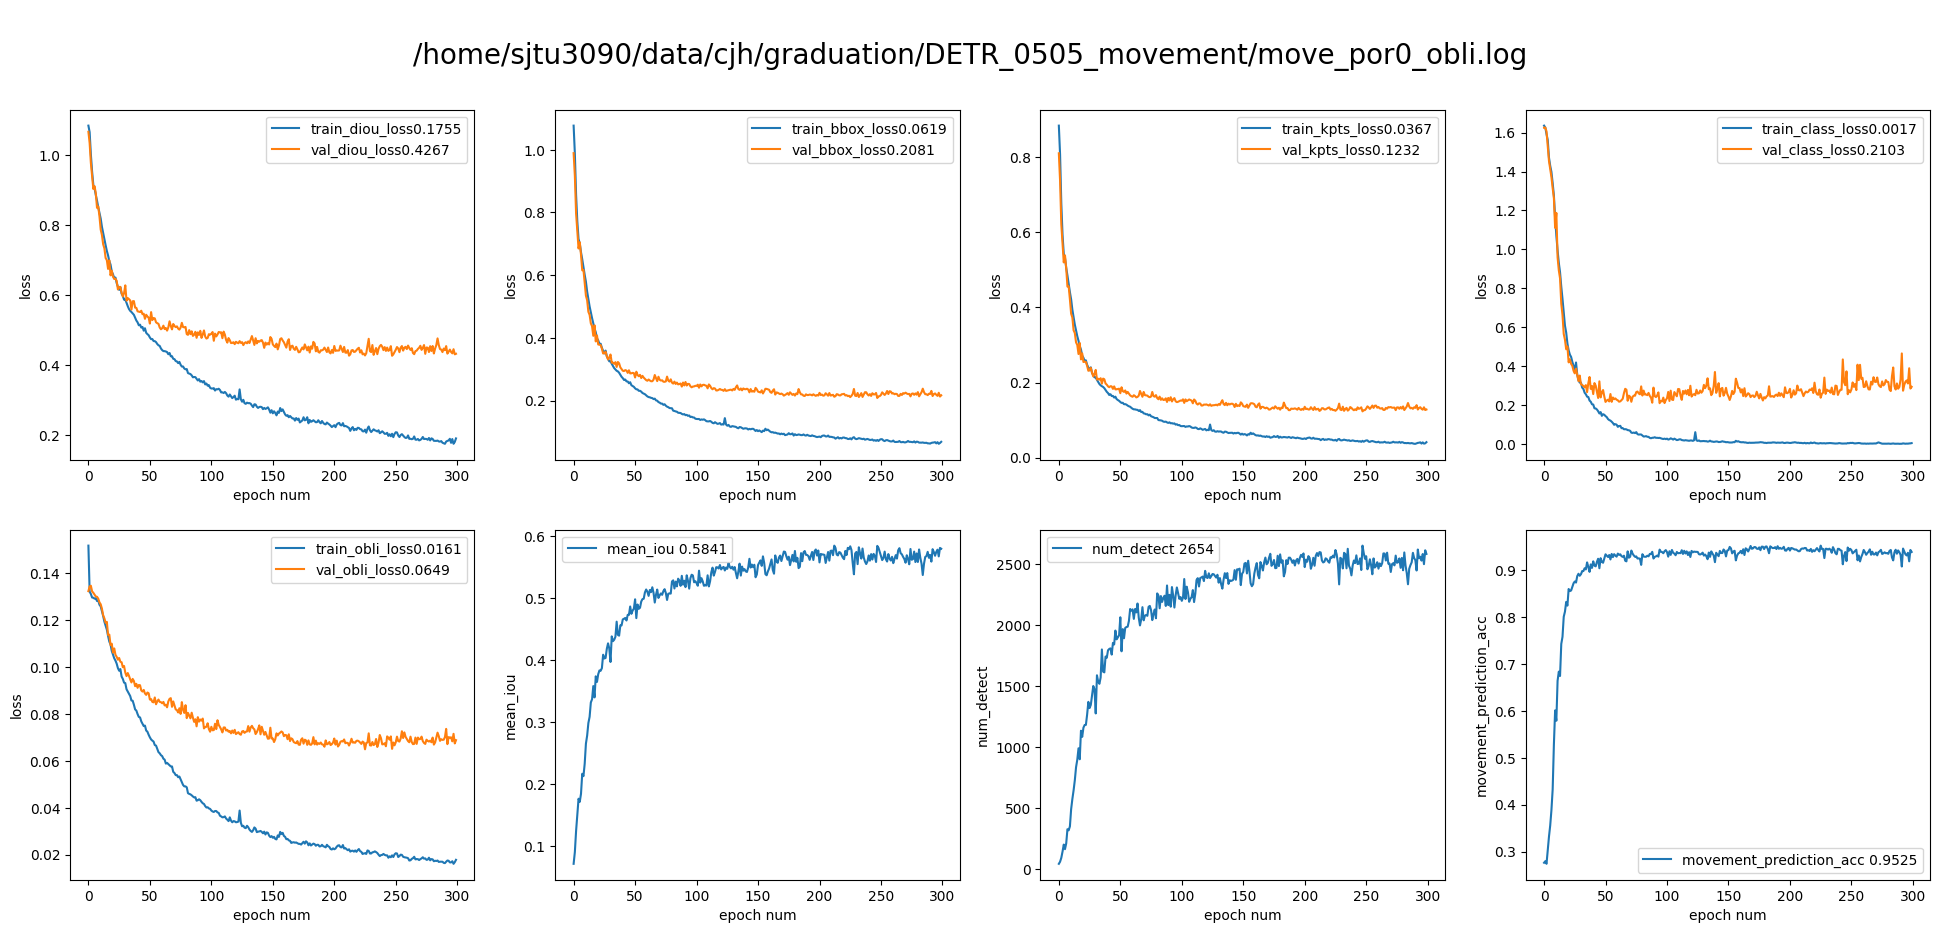

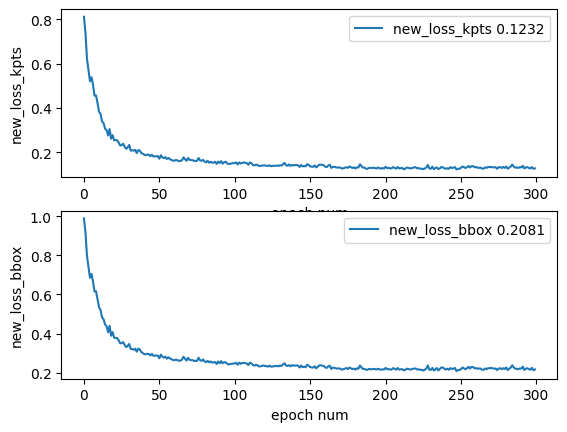

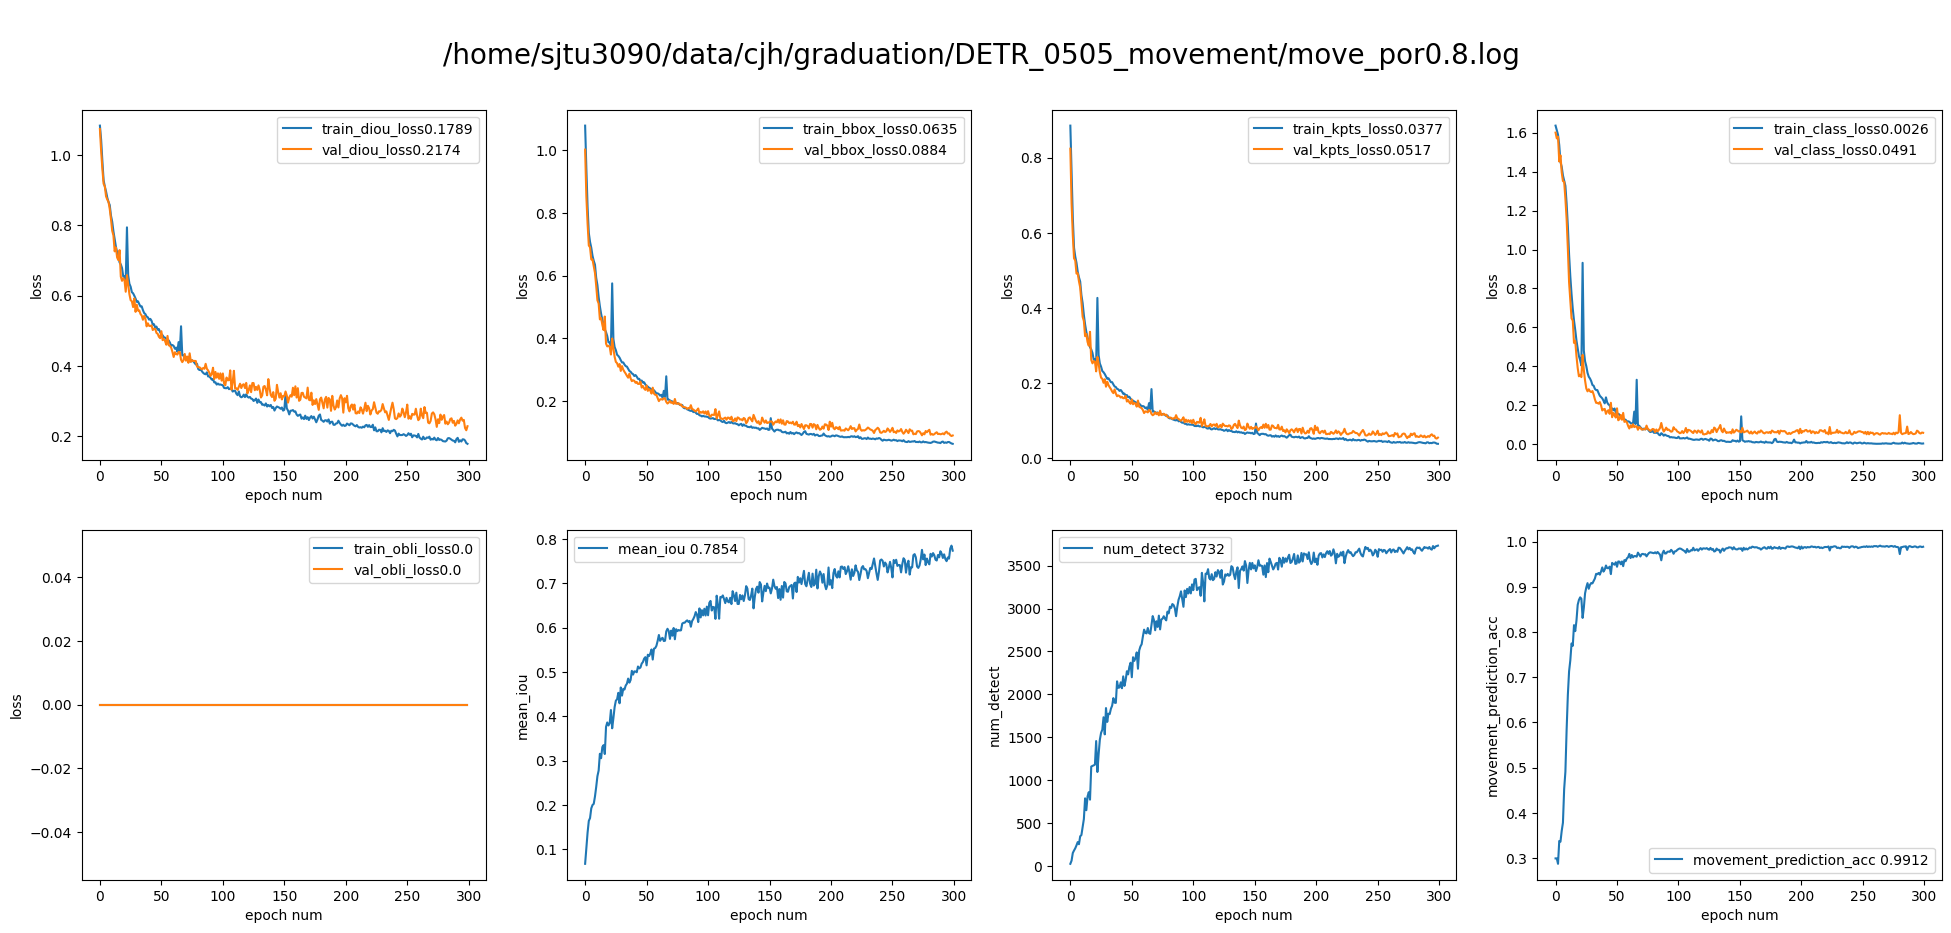

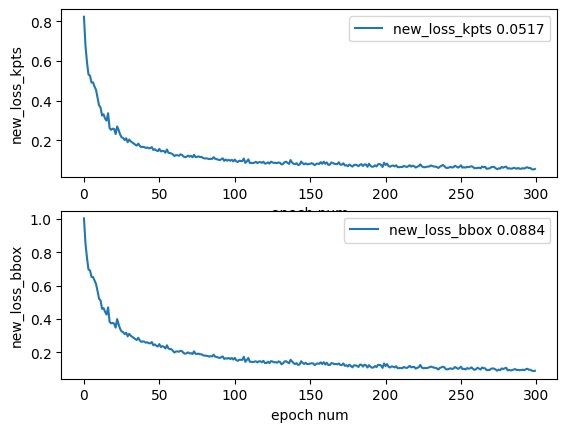

In [3]:
fig=plotting_results(r'/home/sjtu3090/data/cjh/graduation/DETR_0505_movement/move_por0_obli.log')
fig=plotting_results(r'/home/sjtu3090/data/cjh/graduation/DETR_0505_movement/move_por0.8.log')



obli_set = False  , nq_set = False
300


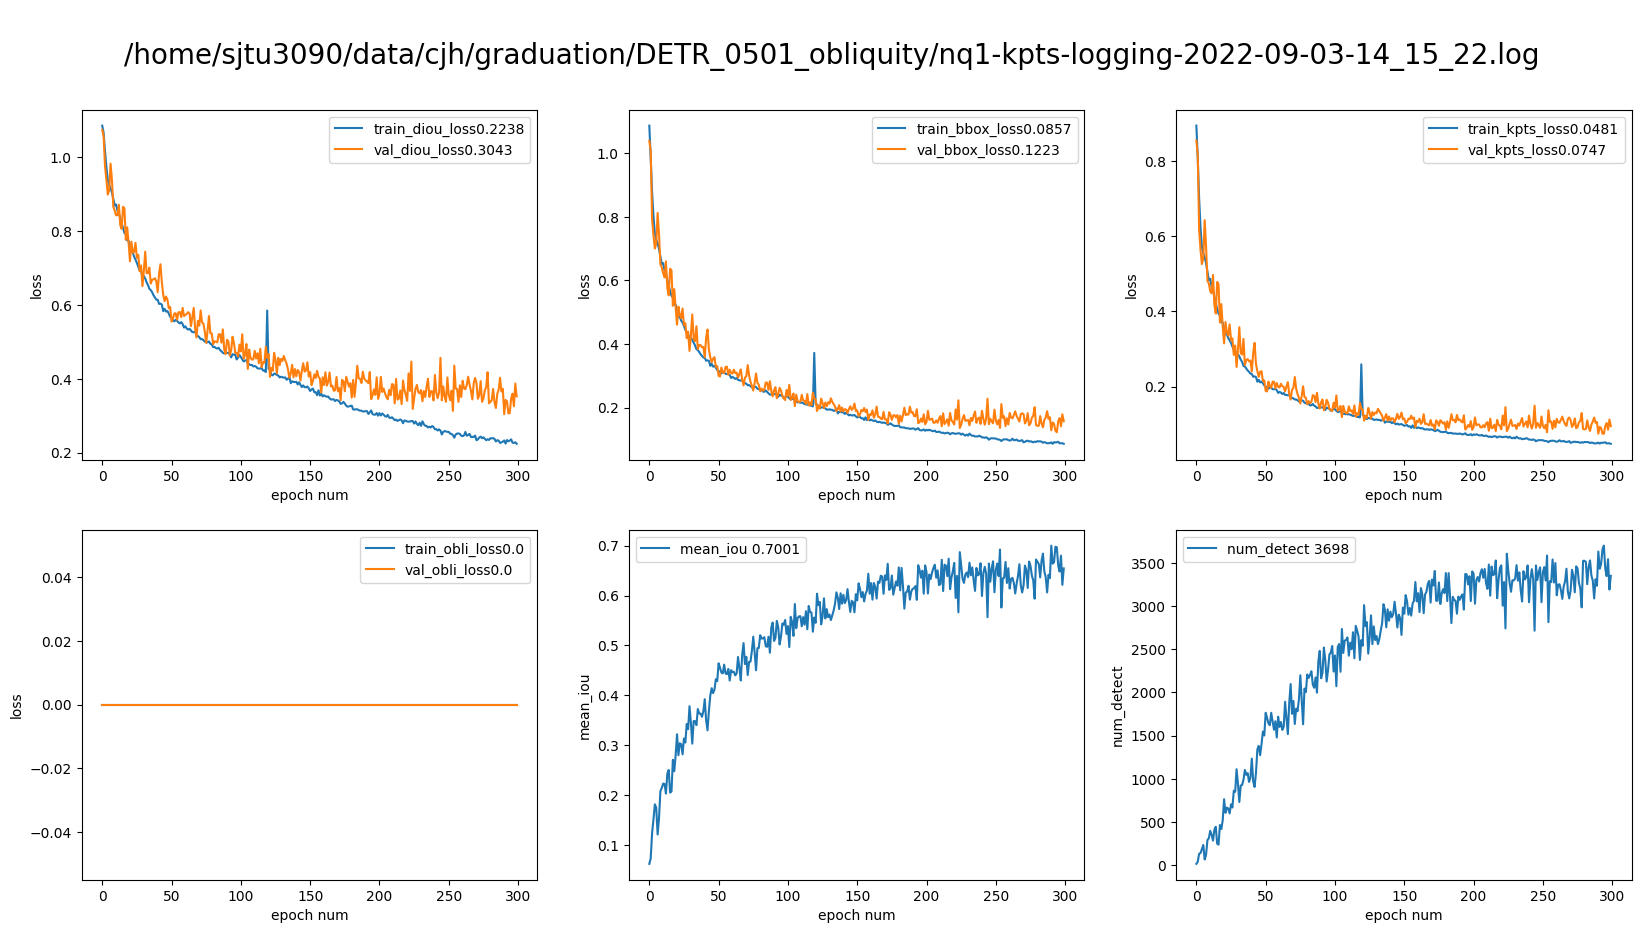

In [7]:
fig=plotting_results(r'/home/sjtu3090/data/cjh/graduation/DETR_0501_obliquity/nq1-kpts-logging-2022-09-03-14_15_22.log')

In [27]:
import json
import numpy as np
from matplotlib import pyplot as plt

with open('feature_map.json', 'r') as file:
    record_dict = json.load(file)


feature_map = record_dict['hs'][0]
feature_map = [i[0] for i in feature_map]
# feature_map = record_dict['memory']
feature_map = np.array(feature_map)
print(feature_map.shape)
print(feature_map.mean())
print(feature_map.max())
for i in range(10):
    plt.figure(figsize=(5, 10), dpi=500)
    # plt.imshow(feature_map[i])
    plt.imshow(feature_map)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'feature_map.json'

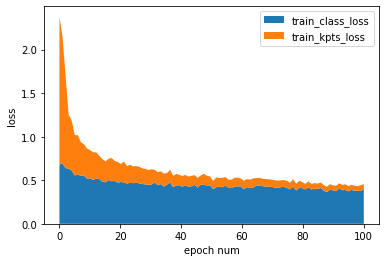

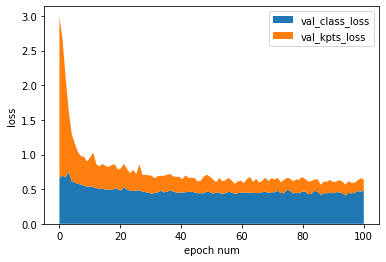

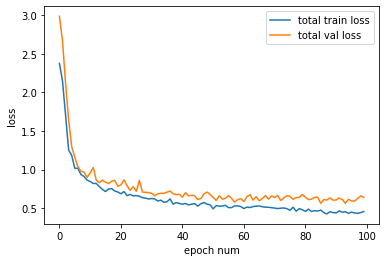

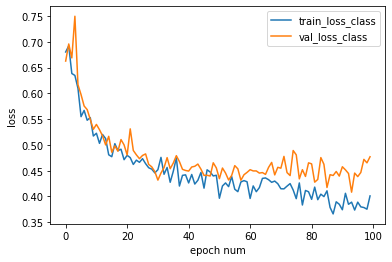

In [33]:
import json
import numpy as np
from matplotlib import pyplot as plt


train_loss_kpts=[]
train_loss_class=[]
val_loss_kpts=[]
val_loss_class=[]
train_loss_total=[]
val_loss_total=[]
with open('/home/sjtu/data/HUAWEI/DETR_onlyR_multi_716_szy/logging/logging-2022-07-18-13:46:14.log','r',encoding='utf-8') as file:
    for line in file.readlines():
        if line.startswith('Averaged stats: class_error'):
            val_loss_class.append(float(line.split('loss_ce: ')[1].split(' (')[0].strip()))
            val_loss_kpts.append(float(line.split(': ')[-1].split(' (')[0]))
            val_loss_total.append(val_loss_class[-1]+val_loss_kpts[-1])
        if line.startswith('Averaged stats: lr'):
            train_loss_kpts.append(float(line.split(': ')[-1].split(' (')[0]))
            train_loss_class.append(float(line.split('loss_ce: ')[1].split(' (')[0].strip()))
            train_loss_total.append(train_loss_class[-1]+train_loss_kpts[-1])
total=len(val_loss_class)
x = np.linspace(0, total, total)
plt.figure()
plt.stackplot(x,train_loss_class,train_loss_kpts,baseline='zero', labels=['train_class_loss','train_kpts_loss'] )

plt.legend()
plt.xlabel('epoch num')
plt.ylabel('loss')
plt.show()

plt.figure()
plt.stackplot(x,val_loss_class,val_loss_kpts,baseline='zero', labels=['val_class_loss','val_kpts_loss'] )

plt.legend()
plt.xlabel('epoch num')
plt.ylabel('loss')
plt.show()

plt.figure()
plt.plot(train_loss_total,label='total train loss')
plt.plot(val_loss_total,label='total val loss')
plt.legend()
plt.xlabel('epoch num')
plt.ylabel('loss')
plt.show()

plt.figure()
plt.plot(train_loss_class,label='train_loss_class')
plt.plot(val_loss_class,label='val_loss_class')
plt.legend()
plt.xlabel('epoch num')
plt.ylabel('loss')
plt.show()

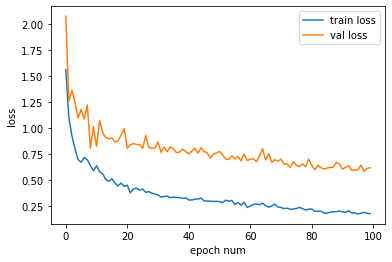

In [11]:
import json
import numpy as np
from matplotlib import pyplot as plt


loss_2=[]
result_2=[]
with open('logging/logging-2022-07-16-18:39:52.log','r',encoding='utf-8') as file:
    for line in file.readlines():
        if line.startswith('Averaged stats: class_error'):
            result_2.append(float(line.split(': ')[-1].split(' (')[0]))
        if line.startswith('Averaged stats: lr'):
            loss_2.append(float(line.split(': ')[-1].split(' (')[0]))
    

plt.plot(loss_2,label='train loss')
plt.plot(result_2,label='val loss')
plt.legend()
plt.xlabel('epoch num')
plt.ylabel('loss')
plt.show()


In [8]:
import re
import os
import random
import numpy as np
import torch
from scipy import optimize



a=torch.tensor([[1.0],[2.0],[3.0]])
d=torch.tensor([[10.0],[5.0],[20.0]])
cost_kpt = torch.cdist(a, d, p=1)
print(a)
print(d)
print(cost_kpt)
oup_id,tgt_id=optimize.linear_sum_assignment(cost_kpt[:,:2])
print(oup_id,tgt_id)



tensor([[1.],
        [2.],
        [3.]])
tensor([[10.],
        [ 5.],
        [20.]])
tensor([[ 9.,  4., 19.],
        [ 8.,  3., 18.],
        [ 7.,  2., 17.]])
[1 2] [1 0]
